# Рекомендательные системы

## Collaborative Filtering

Этот подход основан на отношениях между пользователями и предметами, при этом нет никакой информации о пользователях или необходимых предметах.

Все, что вам нужно, - это какой-то рейтинг для каждого взаимодействия между пользователями и элементами, которое произошло там, где это возможно. Для этого типа взаимодействия доступны два вида данных: явные и неявные. 

- Явные: Оценка, например, рейтинг.
- Неявно: Не так очевидно с точки зрения предпочтений, такие как клик, просмотр или покупка.

Наиболее часто обсуждаемый пример - рейтинги фильмов, которые даются по числовой шкале. Мы можем легко увидеть, понравился ли пользователю фильм на основе предоставленного рейтинга. Проблема, однако, в том, что в большинстве случаев люди вообще не предоставляют рейтинги, поэтому объем доступных данных весьма скуден. Netflix, по крайней мере, знает, смотрел ли я что-то, что не требует дополнительного ввода с моей стороны. Может быть так, что я что-то посмотрел, но потом мне это не понравилось. Таким образом, может быть сложнее сделать вывод, следует ли считать этот тип фильмов положительной рекомендацией или нет.

Поскольку больше данных обычно означает лучшую модель, подразумеваемая обратная связь - это то, на чем должны быть сконцентрированы наши усилия. 


## Singular Value Decomposition

Прежде чем мы начнем строить свою собственную систему рекомендаций на примере проблемы, давайте попробуем понять интуцию, как этот метод работает. Совместная фильтрация не требует никакой информации о пользователях или элементах. Есть ли другой способ выяснить, как пользователи и элементы связаны друг с другом? 

Оказывается, можно, если применить матричную факторизацию. Часто матричная факторизация применяется в области уменьшения размерности, где мы пытаемся уменьшить количество элементов, сохраняя при этом соответствующую информацию. Так обстоит дело с [основным компонентным анализом](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA) и очень похожим [разложение по сингулярному значению](https://en.wikipedia.org/wiki/Singular_value_decomposition) (SVD). 

##  Пример

Представим, что у нас есть небольшой онлайн-кинотеатр и мы хотим, чтобы пользователи были довольны и смотрели фильмы у нас, а не на других ресурсах. Создадим небольшую матрицу рейтингов наших фильмов, на основании оценок пользователей.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Названия фильмов
f = ['Терминатор', 'Робокоп', 'Рэмбо', 'Джеймс Бонд','Властелин Колец', 'Хоббит', 'Гарри Поттер', 
     'Американский Пирог', 'Мальчишник в Вегасе', 'Мстители', 'Супермен'] 
len(f)

11

In [3]:
#Наши пользователи
u = ['Вася','Петя','Саша','Женя','Маша','Оля','Лена','Ваня','Ира']
len(u)

9

In [4]:
#Рейтинг фильмов от пользователей. 0 - значит фильм не был просмотрен.
fu = np.array([[9,0,0,6,4,3,5,7,8,6,5],
              [0,0,0,8,10,0,8,5,6,2,0],
              [8,0,5,7,4,0,5,7,8,8,5],
              [5,2,0,4,10,0,9,5,0,0,0],
              [0,0,2,5,7,0,0,9,0,4,0],
              [2,3,0,0,0,7,9,0,5,0,3],
              [5,0,3,8,8,0,0,7,0,2,4],
              [8,7,0,6,5,4,0,8,0,10,0],
              [0,0,2,5,10,0,0,0,9,0,3]])

In [5]:
#Сделаем датафрейм из f,u и fu.
R = pd.DataFrame(fu,u,f)

In [6]:
R

,Терминатор,Робокоп,Рэмбо,Джеймс Бонд,Властелин Колец,Хоббит,Гарри Поттер,Американский Пирог,Мальчишник в Вегасе,Мстители,Супермен
Вася,9,0,0,6,4,3,5,7,8,6,5
Петя,0,0,0,8,10,0,8,5,6,2,0
Саша,8,0,5,7,4,0,5,7,8,8,5
Женя,5,2,0,4,10,0,9,5,0,0,0
Маша,0,0,2,5,7,0,0,9,0,4,0
Оля,2,3,0,0,0,7,9,0,5,0,3
Лена,5,0,3,8,8,0,0,7,0,2,4
Ваня,8,7,0,6,5,4,0,8,0,10,0
Ира,0,0,2,5,10,0,0,0,9,0,3


Вот теперь и встаёт вопрос, какой предложить фильм, чтобы наш пользователь хорошо провёл вечер? Немного поискав на просторах интернета, находим статью о том, что один большой онлнайн-кинотеатр **Netflix** в 2006 году объявил соревнование по разработке рекомендательной системы фильмов. За решение, которое улучшит качество рекомендаций на 10%, была объявлена награда в 1 млн долларов. В итоге в 2011 году такое решение было получено, а работало оно на основе **SVD** - Singular Value Decomposition или Сингулярном Разложении Матриц, если по-русски.

### Немного линейной алгебры.
Смысл SVD состоит в том, что прямоугольную матрицу A мы можем разложить на 3 матрицы: U, Ʃ и V.

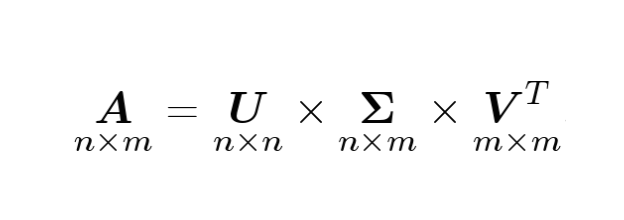



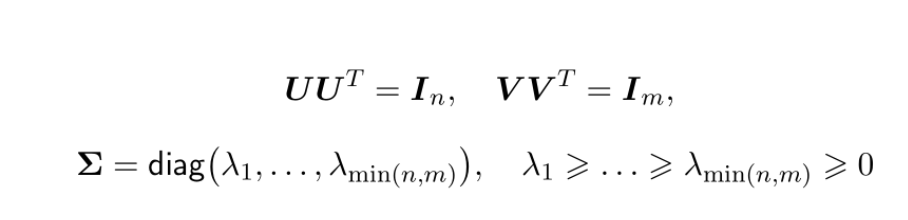





В случае разреженной матрицы, которой обычно является рейтинг фильмов, можно использовать усечённое разложение (truncated SVD), где мы оставляем только d первых чисел $\lambda$. В итоге получаем разложение матрицы A', которое хорошо приближает исходную матрицу A.

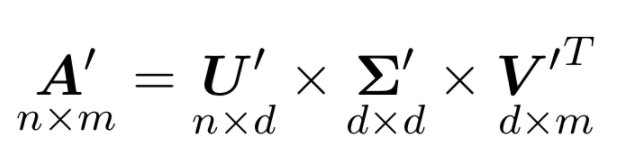

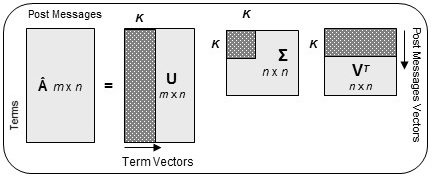

Теперь применим это к нашей рекомендательной системе. У нас есть матрица оценок R, давайте сделаем её сингулярное разложение.
Первые две матрицы перемножим, получим также матрицу $n$ x $d$, в итоге получится такое разложение.


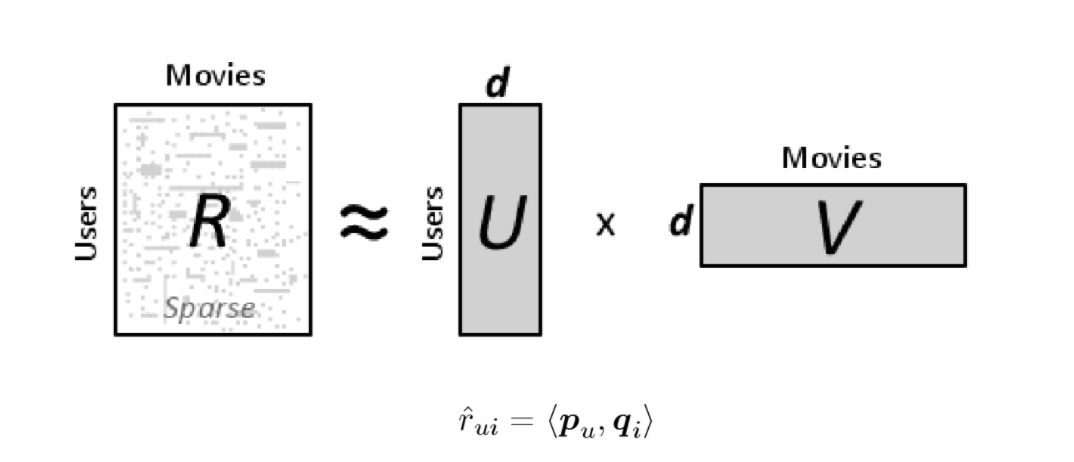

Размерность **d** в данном случае отвечает за количество скрытых свойств/интересов у наших пользователей и фильмов, $\hat r \tiny ui$ - рейтинг фильма, который мы получили перемножив матрицы **U** и **V**.

Таким образом, мы научились приближать исходную матрицу оценок матрицей, полученной на основе перемножения двух матриц, отвечающих за интересы пользователей и свойства фильмов. Но проблема в том, что матрица **R** у нас разреженная, и мы бы хотели бы как раз заполнить пустые (нулевые) элементы оценками пользователей.


Как же это сделать? Для этого нам нужно приблизить уже имеющиеся оценки числами, полученными в результате перемножения матриц $U$ и $V$. Тогда мы получим и оценки для нулей нашей исходной матрицы, т.е. нужно минимизировать такую функцию:

$$ \large \hat r {\tiny ui} = <p_u,q_i>$$

$$\mathcal{L} = \large \frac{1}{n}\Sigma_{ui} (r {\tiny ui}-\hat r {\tiny ui})^{2} = \frac{1}{n}\Sigma_{ui} (r {\tiny ui} -<p_u,q_i>)^{2} \to min,$$ 


где суммирование идёт по ненулевым индексам $u,i$ нашей исходной матрицы оценок, а $n$ - количество оценок в матрице.

Так это же задача регрессии с квадратичной функций потерь **MSE**. **MSE** выбрана по двум причинам: историческая, Netflix предложили метрику **RMSE** и она лучше оптимизируется градиентным спуском.





Функция потерь есть, метод оптимизации выбран, что забыли? Регуляризатор! Воспользуемся $L{\tiny 2}$-регуляризацией и добавим к функции потерь слагаемое, ограничивающее норму матриц: 
$\large \lambda(\Sigma_{u}p {\tiny u}^{2} + \Sigma_{i}q {\tiny i}^{2})$

В итоге получаем:

$$\mathcal{L} = \large  \frac{1}{n}\Sigma_{ui} (r {\tiny ui} - <p_u,q_i>)^{2} +  \lambda(\Sigma_{u}p {\tiny u}^{2} + \Sigma_{i}q {\tiny i}^{2}) \to min,$$ 


Осталось посчитать градиенты для реализации поиска минимума **MSE**. Воспользуемся стохастическим градиентным спуском, поэтому будем считать градиенты на одном объекте $\large r {\tiny ui}$ из матрицы оценок. В итоге получаем такие правила обновления элементов наших матриц **U** и **V**.

$\large 
{p_{u,j}=p_{u,j} + \large \gamma (r_{ui}-\hat r_{ui}) q_{i,j} - \lambda p_{u,j}}$


$\large {q_{i,j}=q_{i,j} + \large \gamma (r_{ui}-\hat r_{ui}) p_{u,j} - \lambda q_{i,j}}$

Индексы $u,i$ - номера пользователя и фильма в наших матрицах **U** (номер строки) и **V** (номер столбца), $j$ - $j$-ая компонента векторов $\large p_{u}$ и $\large q_{i}$.

Ну что же, теперь воспользуемся Питоном и сделаем рекомендации для наших пользователей!

In [7]:
def SVD(R,d,step,lambda_reg,n_iters):
    #инициализуем наши матрицы для разложения
    U = np.zeros((R.shape[0],d))
    V = np.zeros((d,R.shape[1]))
    #начальные элементы матрица U и V будут средним рейтингом по ненулевым оценкам
    mu = R.sum()/(R!=0).sum()
    non_zero = (R!=0).sum()
    U = U + mu
    V = V + mu
    # Создадим списки, где будут индексы нулевых и ненулевых элементов матрицы R
    indx=[]
    zero_indx = []
    # Инициализируем MSE в начале и будем отслеживать в процессе обучения
    MSE_start = 0
    MSE=[]
    # Найдём индексы нулевых и ненулевых элементов
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            if R[i][j]>0:
                indx.append([i,j])
                MSE_start+=((R[i,j]-np.dot(U[i,:],V[:,j])) ** 2) / non_zero
            else:
                zero_indx.append([i,j])
    # Сделаем градиентный спуск            
    for n in range(n_iters):
        choice = np.random.randint(0,len(indx))
        ij = indx[choice]
        for k in range(0,d):
            U[ij[0],k] = U[ij[0],k] + step * ((R[ij[0]][ij[1]] - 
                                               np.dot(U[ij[0],:],V[:,ij[1]])) * V[k,ij[1]] - 
                                              lambda_reg * U[ij[0],k])
            V[k,ij[1]] = V[k,ij[1]] + step * ((R[ij[0]][ij[1]] - 
                                               np.dot(U[ij[0],:],V[:,ij[1]])) * U[ij[0],k] - 
                                              lambda_reg * V[k,ij[1]])
            
        L=0
        for i in range(R.shape[0]):
            for j in range(R.shape[1]):
                if R[i,j]>0:
                    L+=((R[i,j]-np.dot(U[i,:],V[:,j])) ** 2)/non_zero
        MSE.append(L)    
    return U,V, MSE_start, MSE

In [8]:
U,V,M_1,M_end = SVD(R.values,3,0.01,0.1,3000)

In [9]:
R.index

Index(['Вася', 'Петя', 'Саша', 'Женя', 'Маша', 'Оля', 'Лена', 'Ваня', 'Ира'], dtype='object')

In [10]:
U

array([[-0.01575587, -0.52131038,  1.88971387],
       [-1.14730034,  1.31010871,  1.64542991],
       [-0.03880946, -0.68883834,  2.36118006],
       [-1.7395885 ,  1.66919281,  1.82320023],
       [-2.3409986 ,  1.38074468,  2.81237771],
       [-2.05115074,  1.53279287,  2.12139248],
       [-1.55969575,  1.30953168,  2.07398728],
       [-0.58917643, -0.71614153,  2.9520254 ],
       [-2.44895434,  1.76278123,  2.72874944]])

In [11]:
R.columns

Index(['Терминатор', 'Робокоп', 'Рэмбо', 'Джеймс Бонд', 'Властелин Колец',
       'Хоббит', 'Гарри Поттер', 'Американский Пирог', 'Мальчишник в Вегасе',
       'Мстители', 'Супермен'],
      dtype='object')

In [12]:
V[:,-1]

array([5.20619677, 3.45287429, 3.4938551 ])

In [13]:
r_cap = np.zeros((R.shape[0],R.shape[1]))
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        r_cap[i,j]=np.dot(U[i,:],V[:,j])

In [14]:
R

,Терминатор,Робокоп,Рэмбо,Джеймс Бонд,Властелин Колец,Хоббит,Гарри Поттер,Американский Пирог,Мальчишник в Вегасе,Мстители,Супермен
Вася,9,0,0,6,4,3,5,7,8,6,5
Петя,0,0,0,8,10,0,8,5,6,2,0
Саша,8,0,5,7,4,0,5,7,8,8,5
Женя,5,2,0,4,10,0,9,5,0,0,0
Маша,0,0,2,5,7,0,0,9,0,4,0
Оля,2,3,0,0,0,7,9,0,5,0,3
Лена,5,0,3,8,8,0,0,7,0,2,4
Ваня,8,7,0,6,5,4,0,8,0,10,0
Ира,0,0,2,5,10,0,0,0,9,0,3


In [15]:
R_cap = pd.DataFrame(r_cap,u,f)

In [16]:
R_cap

,Терминатор,Робокоп,Рэмбо,Джеймс Бонд,Властелин Колец,Хоббит,Гарри Поттер,Американский Пирог,Мальчишник в Вегасе,Мстители,Супермен
Вася,6.645764,5.472389,4.904232,5.403122,4.021662,4.084200,5.235240,6.011507,6.410176,6.231710,4.720339
Петя,5.532038,4.193504,4.146123,5.229871,7.529187,6.598198,8.413561,6.760095,7.066765,3.046398,4.299463
Саша,8.051300,6.632301,5.838285,6.560668,4.780563,4.827331,6.265975,7.278513,7.745612,7.677091,5.669099
Женя,4.136668,2.921651,2.356888,4.495806,7.630579,6.079703,8.326086,6.154444,6.246685,1.865835,3.076870
Маша,4.016297,2.753862,0.846012,4.815548,7.481122,5.241398,8.330265,6.489545,6.345491,2.915996,2.405879
Оля,3.140022,2.071107,0.809066,3.904805,6.876489,4.949391,7.493348,5.460974,5.363478,1.649267,2.025685
Лена,5.032626,3.718438,2.996531,5.106952,7.483904,6.097931,8.365095,6.679300,6.827657,3.067396,3.647776
Ваня,7.373533,5.991774,4.263085,6.388133,4.661888,4.097591,6.146433,7.149588,7.399888,7.746103,4.773834
Ира,4.398943,3.009864,1.428931,5.189859,8.571615,6.276332,9.429725,7.100056,7.020218,2.607668,2.870779


In [17]:
print ('Start MSE:',M_1,'Finish MSE:',M_end[-1])

Start MSE: 9713.71756666667 Finish MSE: 1.428592857595387


In [18]:
print ('Start RMSE',np.sqrt(M_1),'Finish RMSE',np.sqrt(M_end[-1]))

Start RMSE 98.5581938078548 Finish RMSE 1.1952375737046534


In [19]:
n = (R.values != 0).sum()

In [20]:
L=0
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        if R.values[i,j]>0:
            L+=((R.values[i,j]-R_cap.values[i,j]) ** 2)/n

In [21]:

for col in R_cap:
    R_cap[col] = R_cap[col].astype(int)

In [22]:
R_cap.head()

,Терминатор,Робокоп,Рэмбо,Джеймс Бонд,Властелин Колец,Хоббит,Гарри Поттер,Американский Пирог,Мальчишник в Вегасе,Мстители,Супермен
Вася,6,5,4,5,4,4,5,6,6,6,4
Петя,5,4,4,5,7,6,8,6,7,3,4
Саша,8,6,5,6,4,4,6,7,7,7,5
Женя,4,2,2,4,7,6,8,6,6,1,3
Маша,4,2,0,4,7,5,8,6,6,2,2


In [23]:
L=0
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        if R.values[i,j]>0:
            L+=((R.values[i,j]-R_cap.values[i,j]) ** 2)/n
print('RMSE: ' ,np.sqrt(L))

RMSE:  1.4605934866804429


В итоге получили матрицу оценок с помощью SGD. Как видно, MSE сильно упал. Можно поиграться с гиперпараметрами, чтобы настроить качество. Как итог, выбираем фильмы с наибольшей оценкой и рекомендуем их пользователям! :) 

В заключение хочется сказать, что есть хорошая библиотека Surprise, где можно делать рекомендации проще, быстрее и различными способами.
Оставлю [ссылку](http://surpriselib.com/) для ознакомления. 